### Codio Activity 23.3: Using a Pre-trained Network

**Expected Time = 90 minutes**

**Total Points = 50**

This activity introduces the use of a pretrained network with `keras`.  There are many available models, but you will use one that can be fit with smaller image examples.  To do so, you will use the `EfficientNetV2B0` model with the `cifar10` dataset from `keras`.  

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

2022-09-17 13:59:10.258315: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-17 13:59:10.258371: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


#### Information on the Model and Dataset

For more information on the model you can consult the paper from its origin [here](https://arxiv.org/abs/1905.11946) and the keras documentation on the model [here](https://keras.io/api/applications/efficientnet/).  For your purposes, recognize that this model has been trained on 1000 image classes and you will use the resulting feature maps to transform the `cifar10` data.

**The Data**

This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. 

The classes are:

|Label	|Description|
| ------ | ------- |
|0	|airplane|
|1	|automobile|
|2	|bird|
|3	|cat|
|4	|deer|
|5	|dog|
|6	|frog|
|7	|horse|
|8	|ship|
|9	|truck|

[Back to top](#-Index)

### Problem 1

#### Dowloading the model

**10 Points**

Below, download the `EfficientNetV2B0` as `base_model` below with appropriate `input_shape` and `include_top = False`. 

In [3]:
### GRADED
tf.random.set_seed(42)
base_model = ''

    
# YOUR CODE HERE
#raise NotImplementedError()
tf.random.set_seed(42)
base_model = EfficientNetV2B0(input_shape = (32, 32, 3), include_top = False)

### ANSWER CHECK
print(base_model)

2022-09-17 14:07:25.751799: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-17 14:07:25.751850: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-17 14:07:25.751876: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (brigadeironic-beastdanube): /proc/driver/nvidia/version does not exist
2022-09-17 14:07:25.752162: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


24274472/24274472 [==============================] - 0s 0us/step


[Back to top](#-Index)

### Problem 2

#### Loading and Preparing the Data

**10 Points**

Below, load in the data from `cifar10` and prepare the target variable.  Assign these as `X_train`, `Y_train`, `X_test`, and `Y_test` respectively.

In [5]:
from tensorflow.keras.datasets import cifar10

In [6]:
### GRADED
X_train = ''
X_test = ''
Y_train = ''
Y_test = ''

    
# YOUR CODE HERE
#raise NotImplementedError()
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

### ANSWER CHECK
print(X_train.shape)
print(Y_train.shape)

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)
(50000, 10)


[Back to top](#-Index)

### Problem 3

#### Generating Feature Maps

**10 Points**

To use the pretrained network, you will use the `.predict` method to pass `X_train` through and assign the results as `features`.  This can take a while to train because the network is fairly complex.  

In [7]:
#for speeding up the process
X_train_sample = X_train[:10]
y_train_sample = Y_train[:10]

In [9]:
### GRADED
tf.random.set_seed(42)
features = ''

    
# YOUR CODE HERE
#raise NotImplementedError()
features = base_model.predict(X_train_sample)
### ANSWER CHECK
print(features.shape)

1/1 [==============================] - 2s 2s/step
(10, 1, 1, 1280)


[Back to top](#-Index)

### Problem 4

#### Making Predictions for Data

**10 Points**

Now, using the `features` you are to create a top for the network named `top` that will flatten these features and use a `Dense` hidden layer with 100 units and an output appropriate for the 10 categories in `cifar10`. Compile the model using accuracy as the metric, and fit the model using `features` with `Y_train` for 20 epochs.  Assign the fit history as `history` below.

In [10]:
### GRADED
tf.random.set_seed(42)
top = ''
history = ''
    
# YOUR CODE HERE
#raise NotImplementedError()
tf.random.set_seed(42)
top = Sequential([Flatten(), Dense(100, activation = 'relu'),
                    Dense(10, activation = 'softmax')])

top.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = top.fit(features, y_train_sample, validation_split = 0.2, 
                  epochs = 20, verbose = 0)

### ANSWER CHECK
print(history.history['accuracy'][-5:])
print(history.history['val_accuracy'][-5:])

[1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0]


[Back to top](#-Index)

### Problem 5

#### Predicting Test Data

**10 Points**

To make predictions, you will first need to transform the data using the `base_model` and then predict.  Do this with the first five images in the test dataset, given below as `test_exs` and save the predictions as `test_preds`.

1/1 [==============================] - 0s 54ms/step
[1 1 9 9 7 1 7 1 7 9]
[3 8 8 0 6 6 1 6 3 1]


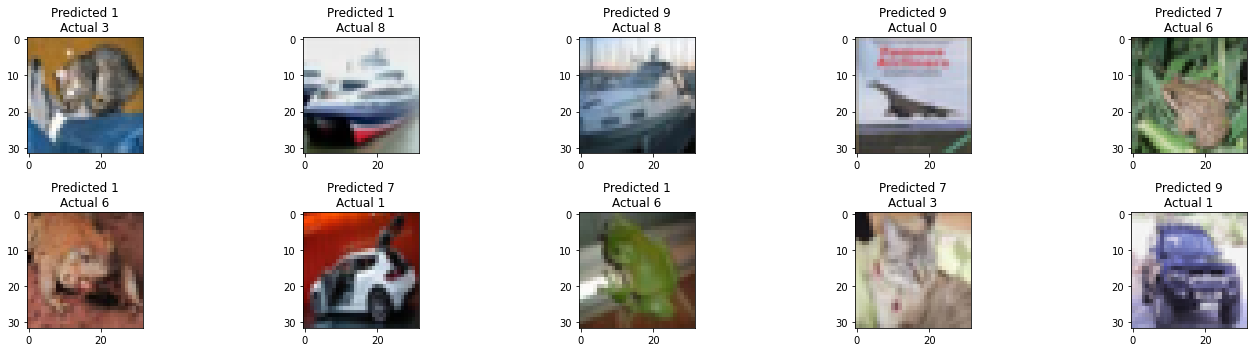

In [11]:
### GRADED
tf.random.set_seed(42)
test_exs = X_test[:10]
test_preds = ''
  
# YOUR CODE HERE
#raise NotImplementedError()
test_features = base_model.predict(test_exs)
test_preds = np.argmax(top.predict(test_features), axis = 1)

### ANSWER CHECK
print(test_preds)
print(y_test[:10].reshape(10,))
fig, ax = plt.subplots(2, 5, figsize = (20, 5))
c = 0
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(X_test[c])
        ax[i, j].set_title(f'Predicted {test_preds[c]}\nActual {y_test[c][0]}')
        c += 1
plt.tight_layout()